## Unit commitment problem

The ucp is a mixed- integer combinatorial optimization problem including uncertain supply from renewable energies (e.g. wind, solar), potential machine failure or demand. The objective is to allocate power ressources to match a certain demand at all times producing minimal cost.

In this notebook we show how to formulate the optimization problem as a QUBO that can lateron solved with quantum algorithms, quantum annealing, quantum-inspired methods or classical heuristics

In [1]:
from math import pi
import math
import cmath
import random
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from scipy.stats import norm
import networkx as nx
from IPython.display import Image
import timeit

In [2]:
# import pygrnd and other libraries needed
# we build on top of the open source framework qiskit (qiskit.org)
import pygrnd

from pygrnd.qc.helper import *
from pygrnd.qc.brm import brm
from pygrnd.qc.brm_oracle import brmoracle
from pygrnd.qc.QAE import qae

from pygrnd.optimize.sat_ucp import *
from pygrnd.optimize.meritorder import *

from pygrnd.optimize.bruteforce import *
from pygrnd.optimize.MonteCarloSolver import *
from pygrnd.optimize.qaoa import *

#from qiskit import execute
#from qiskit import Aer



In [3]:
## XXXS

cost=[2,1]
demand=[1]
minup=[1,1]
mindown=[0,0]
maxup=[0,0]
maxdown=[0,0]
maxgen=[1,1]
startcost=[1,1]

start_time = timeit.default_timer()
xxxs,mapsxxxs=createSATqubo(cost, maxgen, demand, minup, mindown, maxup, maxdown, startcost)
end_time = timeit.default_timer()
print('Duration in seconds: {}'.format(end_time - start_time))
print("Size of Qubo: ",len(xxxs),"x",len(xxxs))
print(xxxs)
print(mapsxxxs)

bestenergy,res=dwaveGreedySolver(xxxs,1000)
print(bestenergy,res)

[[-2, 1], [-1, 2], [-4, 3], [-3, 4]]
Number of formulas:  4
maxVariable:  4
convertedFormulas:  [[-2, 1], [-1, 2], [-4, 3], [-3, 4]]
1
0
0
1
3
2
2
3
Constraint QUBO:
  [[ 2. -4.  0.  0.]
 [ 0.  2.  0.  0.]
 [ 0.  0.  2. -4.]
 [ 0.  0.  0.  2.]]
Cost QUBO:
  [[ 4. -4.  0.  0.]
 [ 0.  2.  0.  0.]
 [ 0.  0.  3. -4.]
 [ 0.  0.  0.  2.]]
penaltyDemand:  100
Demand QUBO:
   [[-96.  -4. 200.   0.]
 [  0.   2.   0.   0.]
 [  0.   0. -97.  -4.]
 [  0.   0.   0.   2.]]
Duration in seconds: 0.00044366600195644423
Size of Qubo:  4 x 4
[[-96.  -4. 200.   0.]
 [  0.   2.   0.   0.]
 [  0.   0. -97.  -4.]
 [  0.   0.   0.   2.]]
[[0], [2]]
#nonzeros/#quboEntries 7 / 16
sparsity 0.4375
-99.0 [0, 0, 1, 1]


In [4]:
## XXS

cost=[2,1]
demand=[1]
minup=[1,1]
mindown=[0,0]
maxup=[0,0]
maxdown=[0,0]
maxgen=[1,1]
startcost=[1,1]


start_time = timeit.default_timer()


xxs,mapsxxs=createSATqubo(cost, maxgen, demand, minup, mindown, maxup, maxdown, startcost)
#xxs,mapsxxs=createSATquboPenalty(cost, maxgen, demand, minup, mindown, maxup, maxdown, startcost,100,1,1,1) #100,50,10,10

end_time = timeit.default_timer()
print('Duration in seconds: {}'.format(end_time - start_time))
print("Size of Qubo: ",len(xxs),"x",len(xxs))
print(xxs)
print(mapsxxs)

bestenergyxxs,resxxs=dwaveGreedySolver(xxs,1000)
print(bestenergyxxs,resxxs)

[[-2, 1], [-1, 2], [-4, 3], [-3, 4]]
Number of formulas:  4
maxVariable:  4
convertedFormulas:  [[-2, 1], [-1, 2], [-4, 3], [-3, 4]]
1
0
0
1
3
2
2
3
Constraint QUBO:
  [[ 2. -4.  0.  0.]
 [ 0.  2.  0.  0.]
 [ 0.  0.  2. -4.]
 [ 0.  0.  0.  2.]]
Cost QUBO:
  [[ 4. -4.  0.  0.]
 [ 0.  2.  0.  0.]
 [ 0.  0.  3. -4.]
 [ 0.  0.  0.  2.]]
penaltyDemand:  100
Demand QUBO:
   [[-96.  -4. 200.   0.]
 [  0.   2.   0.   0.]
 [  0.   0. -97.  -4.]
 [  0.   0.   0.   2.]]
Duration in seconds: 0.00039200000173877925
Size of Qubo:  4 x 4
[[-96.  -4. 200.   0.]
 [  0.   2.   0.   0.]
 [  0.   0. -97.  -4.]
 [  0.   0.   0.   2.]]
[[0], [2]]
#nonzeros/#quboEntries 7 / 16
sparsity 0.4375
-99.0 [0, 0, 1, 1]


In [5]:
## XS

cost=[2,1]

demand=[1,2,1]
#demand=[1,2,1,2,1,2,1,2,1,2,1,2,1,2,1]
#minup=[2,3]
minup=[2,3]
mindown=[0,0]
maxup=[0,0]
maxdown=[0,0]
maxgen=[1,1]
startcost=[1,1]

start_time = timeit.default_timer()

xs,mapsxs=createSATqubo(cost, maxgen, demand, minup, mindown, maxup, maxdown, startcost)
#xs,mapsxs=createSATquboPenalty(cost, maxgen, demand, minup, mindown, maxup, maxdown, startcost,100,1,1,1) #100,50,10,10
end_time = timeit.default_timer()
print('Duration in seconds: {}'.format(end_time - start_time))
print("Size of Qubo: ",len(xs),"x",len(xs))
print(xs)
print(mapsxs)

bestenergyxs,resxs=dwaveGreedySolver(xs,1000)
print(bestenergyxs,resxs)

[[-4, 1], [-4, 2], [-5, 2], [-5, 3], [-1, 4], [-2, 4, 5], [-3, 5], [-9, 6], [-9, 7], [-9, 8], [-6, 9], [-7, 9], [-8, 9]]
Number of formulas:  13
maxVariable:  9
convertedFormulas:  [[-4, 1], [-4, 2], [-5, 2], [-5, 3], [-1, 4], [-2, 4, 10], [10, 5], [-3, 5], [-9, 6], [-9, 7], [-9, 8], [-6, 9], [-7, 9], [-8, 9]]
3
0
3
1
4
1
4
2
0
3
9
4
2
4
8
5
8
6
8
7
5
8
6
8
7
8
Constraint QUBO:
  [[ 2.  0.  0. -4.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0. -4. -2.  0.  0.  0.  0.  3.]
 [ 0.  0.  2.  0. -4.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  7.  0.  0.  0.  0.  0. -3.]
 [ 0.  0.  0.  0.  2.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.  2.  0.  0. -4.  0.]
 [ 0.  0.  0.  0.  0.  0.  2.  0. -4.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  2. -4.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  6.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -3.]]
Cost QUBO:
  [[ 4. -1.  0. -4.  0.  0.  0.  0.  0.  0.]
 [ 0.  2. -1. -4. -2.  0.  0.  0.  0.  3.]
 [ 0.  0.  5.  0. -4.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  7.  0.  0.  0.  0.  0. -3.]
 

In [6]:
dffull, solutionVector, bufferSupply, solutionCostTotal, TotalSupply=printSolution(resxs, mapsxs, cost, minup, demand, maxgen)
total_violate, ratio_violate, num_constraints, unmatched_demand, unmatched_demand_ratio = checkMinupMinDownMaxupMaxdownChecks(minup,mindown,maxup,maxdown,solutionVector,TotalSupply,demand)

Total costs of production:  5
['010', '111']
unit:  0  --> Minup VIOLATION -1
unit:  1  --> Minup Correct
no mindown constraint
no mindown constraint
no maxup constraint
no maxup constraint
no maxdown constraint
no maxdown constraint
demand                 = supply  --> constraint matched
unmatched demand ratio =  1.0
Demand                 =  1 | Supply =  1
demand                 = supply  --> constraint matched
unmatched demand ratio =  1.0
Demand                 =  2 | Supply =  2
demand                 = supply  --> constraint matched
unmatched demand ratio =  1.0
Demand                 =  1 | Supply =  1
Number of demand constraint breaks =  0


In [7]:
## S

cost=[2,1]
demand=[1,2,1,2,1]
minup=[2,3]
mindown=[0,0]
maxup=[0,0]
maxdown=[0,0]
maxgen=[1,1]
startcost=[1,1]

start_time = timeit.default_timer()
#s,mapss=createQUBOCostMaxgenDemandMinupMindownMaxupMaxDownStartcostIterativeSort(cost, maxgen, demand, minup, mindown, maxup, maxdown, startcost)
## createSATqubo(cost,maxgen,demand,minup,mindown,maxup,maxdown,startcost,PDemand,PCost,PStart,PConstr)
s,mapss=createSATqubo(cost, maxgen, demand, minup, mindown, maxup, maxdown, startcost) #100,50,10,10
end_time = timeit.default_timer()
print('Duration in seconds: {}'.format(end_time - start_time))
print("Size of Qubo: ",len(s),"x",len(s))
print(mapss)

bestenergys,ress=dwaveGreedySolver(s,1000)
print(bestenergys,ress)

dffull, solutionVector, bufferSupply, solutionCostTotal, TotalSupply=printSolution(ress, mapss, cost, minup, demand, maxgen)
total_violate, ratio_violate, num_constraints, unmatched_demand, unmatched_demand_ratio = checkMinupMinDownMaxupMaxdownChecks(minup,mindown,maxup,maxdown,solutionVector,TotalSupply,demand)

[[-6, 1], [-6, 2], [-7, 2], [-7, 3], [-8, 3], [-8, 4], [-9, 4], [-9, 5], [-1, 6], [-2, 6, 7], [-3, 7, 8], [-4, 8, 9], [-5, 9], [-15, 10], [-15, 11], [-15, 12], [-16, 11], [-16, 12], [-16, 13], [-17, 12], [-17, 13], [-17, 14], [-10, 15], [-11, 15, 16], [-12, 15, 16, 17], [-13, 16, 17], [-14, 17]]
Number of formulas:  27
maxVariable:  17
convertedFormulas:  [[-6, 1], [-6, 2], [-7, 2], [-7, 3], [-8, 3], [-8, 4], [-9, 4], [-9, 5], [-1, 6], [-2, 6, 18], [18, 7], [-3, 7, 19], [19, 8], [-4, 8, 20], [20, 9], [-5, 9], [-15, 10], [-15, 11], [-15, 12], [-16, 11], [-16, 12], [-16, 13], [-17, 12], [-17, 13], [-17, 14], [-10, 15], [-11, 15, 21], [21, 16], [-12, 15, 22], [22, 16, 23], [23, 17], [-13, 16, 24], [24, 17], [-14, 17]]
5
0
5
1
6
1
6
2
7
2
7
3
8
3
8
4
0
5
17
6
18
7
19
8
4
8
14
9
14
10
14
11
15
10
15
11
15
12
16
11
16
12
16
13
9
14
20
15
22
16
23
16
13
16
Constraint QUBO:
  [[ 2.  0.  0.  0.  0. -4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0. 

## Now we solve the QUBO with the inbuild QAOA solver

In [8]:
import pygrnd
from pygrnd.optimize.qaoa import *
from pygrnd.optimize.sat_ucp import *
from qiskit.visualization import plot_histogram


import dimod
import qiskit
import numpy as np

0.0 0.0 0010 -97.0
0.0 1.8849555921538759 1100 -98.0


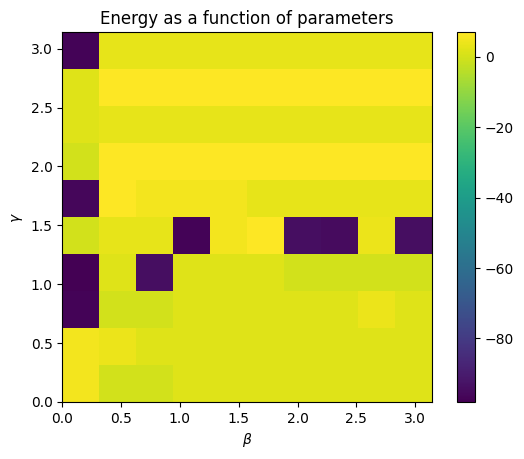

In [9]:
## show solutions landscape
qaoaLandscape(xxs,10,1000)

In [10]:
# solve example set xxs
# xs is a 4x4 qubo that requires 4 qubits
vec, counts, obj, prob, qc, res1, res2, bestBetas, bestGammas = QAOAoptimizeMaxCount(xxs,5,1000)

Selected device:  <qiskit.providers.basic_provider.basic_simulator.BasicSimulator object at 0x177b80500>  with  1000 shots
Trying  5  layer
Generating inital random parameters beta and gamma
Starting with betas:  [3.7443099029981735, 5.905577736913067, 0.7220980631420435, -2.8871889705219846, -4.005059703764794]
Starting with gammas:  [-1.6673195290943505, -0.22400732060630357, 1.211096247479599, 4.326454138601974, -4.637578976309973]
Optimize FIRST round with random initialisation
Optimize SECOND round with the found initialization
Best Beta [ 3.76469093  6.07059848  0.7250357  -2.886231   -3.99910498] Best Gamma [-1.67639508 -0.22336379  1.21768849  4.35000389 -4.61654292]
Now run the QAOA with the found parameters
----------------------------------------------
Optimum =  -99.0  with probability =  0.216
----------------------------------------------
Depth: 67
Gate counts: OrderedDict({'rz': 35, 'cx': 30, 'ry': 20, 'barrier': 11, 'h': 4, 'measure': 4})


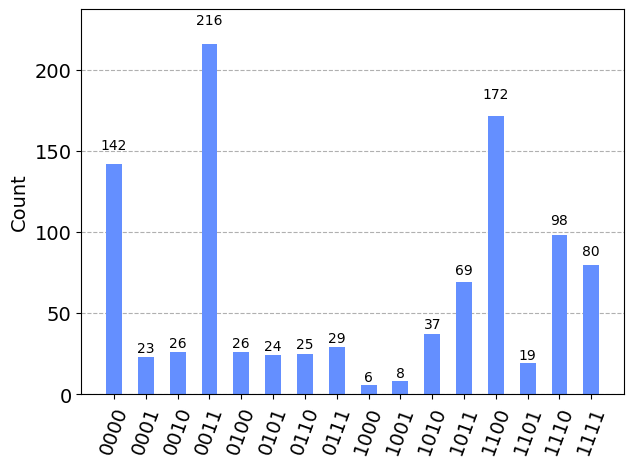

In [11]:
plot_histogram(counts)

In [12]:
## do not approx expectation value by average over all solutions but only use the max count bitstring

Nmax=[]
probamax=[]
Optmax=[]
for i in range(1,10):
    vec, counts, obj, prob, qc, res1, res2, bestBetas, bestGammas = QAOAoptimizeMaxCount(xxs,i,1000)
    Nmax.append(i)
    probamax.append(prob)
    Optmax.append(obj)

Selected device:  <qiskit.providers.basic_provider.basic_simulator.BasicSimulator object at 0x177b80500>  with  1000 shots
Trying  1  layer
Generating inital random parameters beta and gamma
Starting with betas:  [-5.47036518475844]
Starting with gammas:  [3.5979901169169093]
Optimize FIRST round with random initialisation
Optimize SECOND round with the found initialization
Best Beta [-5.47036518] Best Gamma [3.59799012]
Now run the QAOA with the found parameters
----------------------------------------------
Optimum =  0.0  with probability =  0.286
----------------------------------------------
Depth: 15
Gate counts: OrderedDict({'rz': 7, 'cx': 6, 'h': 4, 'ry': 4, 'measure': 4, 'barrier': 3})
Selected device:  <qiskit.providers.basic_provider.basic_simulator.BasicSimulator object at 0x177b80500>  with  1000 shots
Trying  2  layer
Generating inital random parameters beta and gamma
Starting with betas:  [-3.2414167837230634, 0.3186397064355715]
Starting with gammas:  [1.949966325213278

In [13]:
bestenergyxxs

-99.0

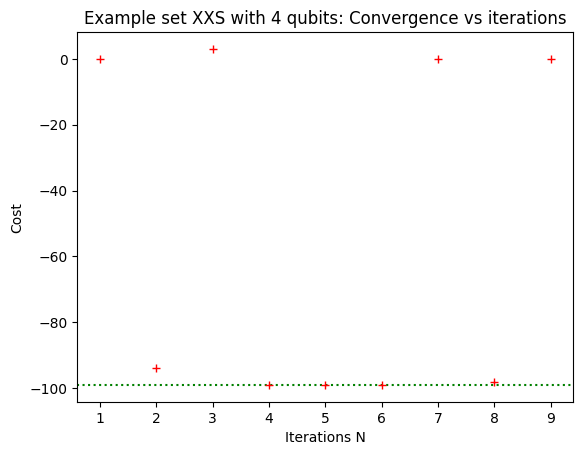

In [14]:
plt.axhline(y=bestenergyxxs, color='g', linestyle=':')
plt.ylabel("Cost")
plt.xlabel("Iterations N")
plt.title("Example set XXS with 4 qubits: Convergence vs iterations")
plt.plot(Nmax,Optmax,'r+')

In [15]:
## approximate the expectation value with all measured bitstrings and take the average
#vec, counts, expectationValue, prob, qc, res1, res2, bestBetas, bestGammas, optimum = QAOAoptimizeExpectation(xxs,5,1000)

Nexp=[]
probaexp=[]
Optexp=[]
expVexp=[]

for i in range(1,10):
    vec, counts, expectationValue, prob, qc, res1, res2, bestBetas, bestGammas, optimum = QAOAoptimizeExpectation(xxs,i,1000)
    Nexp.append(i)
    probaexp.append(prob)
    expVexp.append(expectationValue)
    Optexp.append(optimum)

Selected device:  <qiskit.providers.basic_provider.basic_simulator.BasicSimulator object at 0x177b806b0>  with  1000 shots
Trying  1  layer
Generating inital random parameters beta and gamma
Starting with betas:  [1.6893918276508426]
Starting with gammas:  [5.169603759339768]
Optimize FIRST round with random initialisation
Optimize SECOND round with the found initialization
Best Beta [1.64152585] Best Gamma [4.67560205]
Now run the QAOA with the found parameters
----------------------------------------------
Expectation value =  -44.013
----------------------------------------------
Optimum =  4.0  with probability =  0.09
----------------------------------------------
Depth: 15
Gate counts: OrderedDict({'rz': 7, 'cx': 6, 'h': 4, 'ry': 4, 'measure': 4, 'barrier': 3})
Selected device:  <qiskit.providers.basic_provider.basic_simulator.BasicSimulator object at 0x177b806b0>  with  1000 shots
Trying  2  layer
Generating inital random parameters beta and gamma
Starting with betas:  [-0.49656

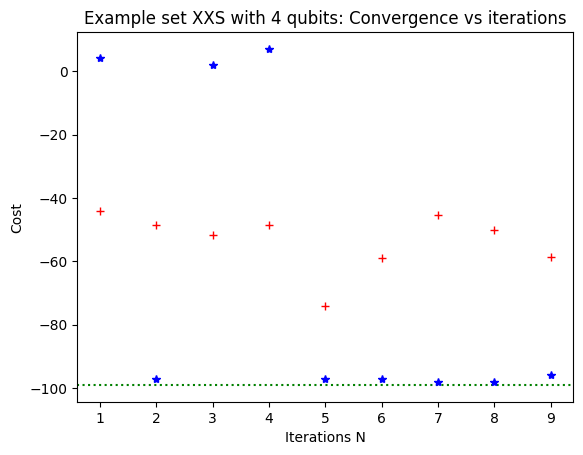

In [16]:
plt.axhline(y=bestenergyxxs, color='g', linestyle=':')
plt.ylabel("Cost")
plt.xlabel("Iterations N")
plt.title("Example set XXS with 4 qubits: Convergence vs iterations")
plt.plot(Nexp,expVexp,'r+')
plt.plot(Nexp,Optexp,'b*')

Text(0.5, 1.0, 'Example set XXS with 4 qubits: Convergence vs iterations')

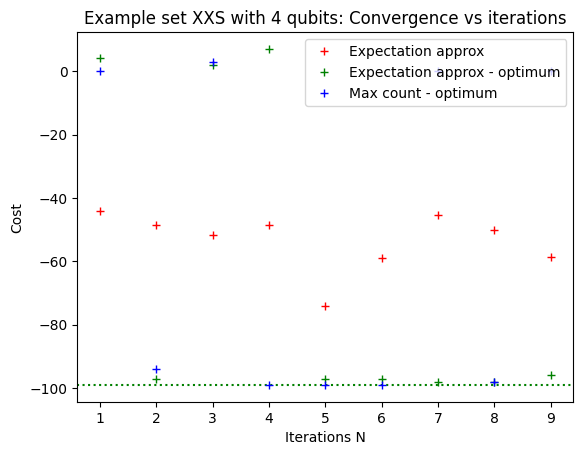

In [17]:
plt.axhline(y=bestenergyxxs, color='g', linestyle=':')
plt.plot(Nexp,expVexp,'r+',label="Expectation approx")
plt.plot(Nexp,Optexp,'g+',label="Expectation approx - optimum")
plt.plot(Nmax,Optmax,'b+',label="Max count - optimum")
plt.legend()
plt.ylabel("Cost")
plt.xlabel("Iterations N")
plt.title("Example set XXS with 4 qubits: Convergence vs iterations")

Circuit depth:  119  | Number of qubits:  161


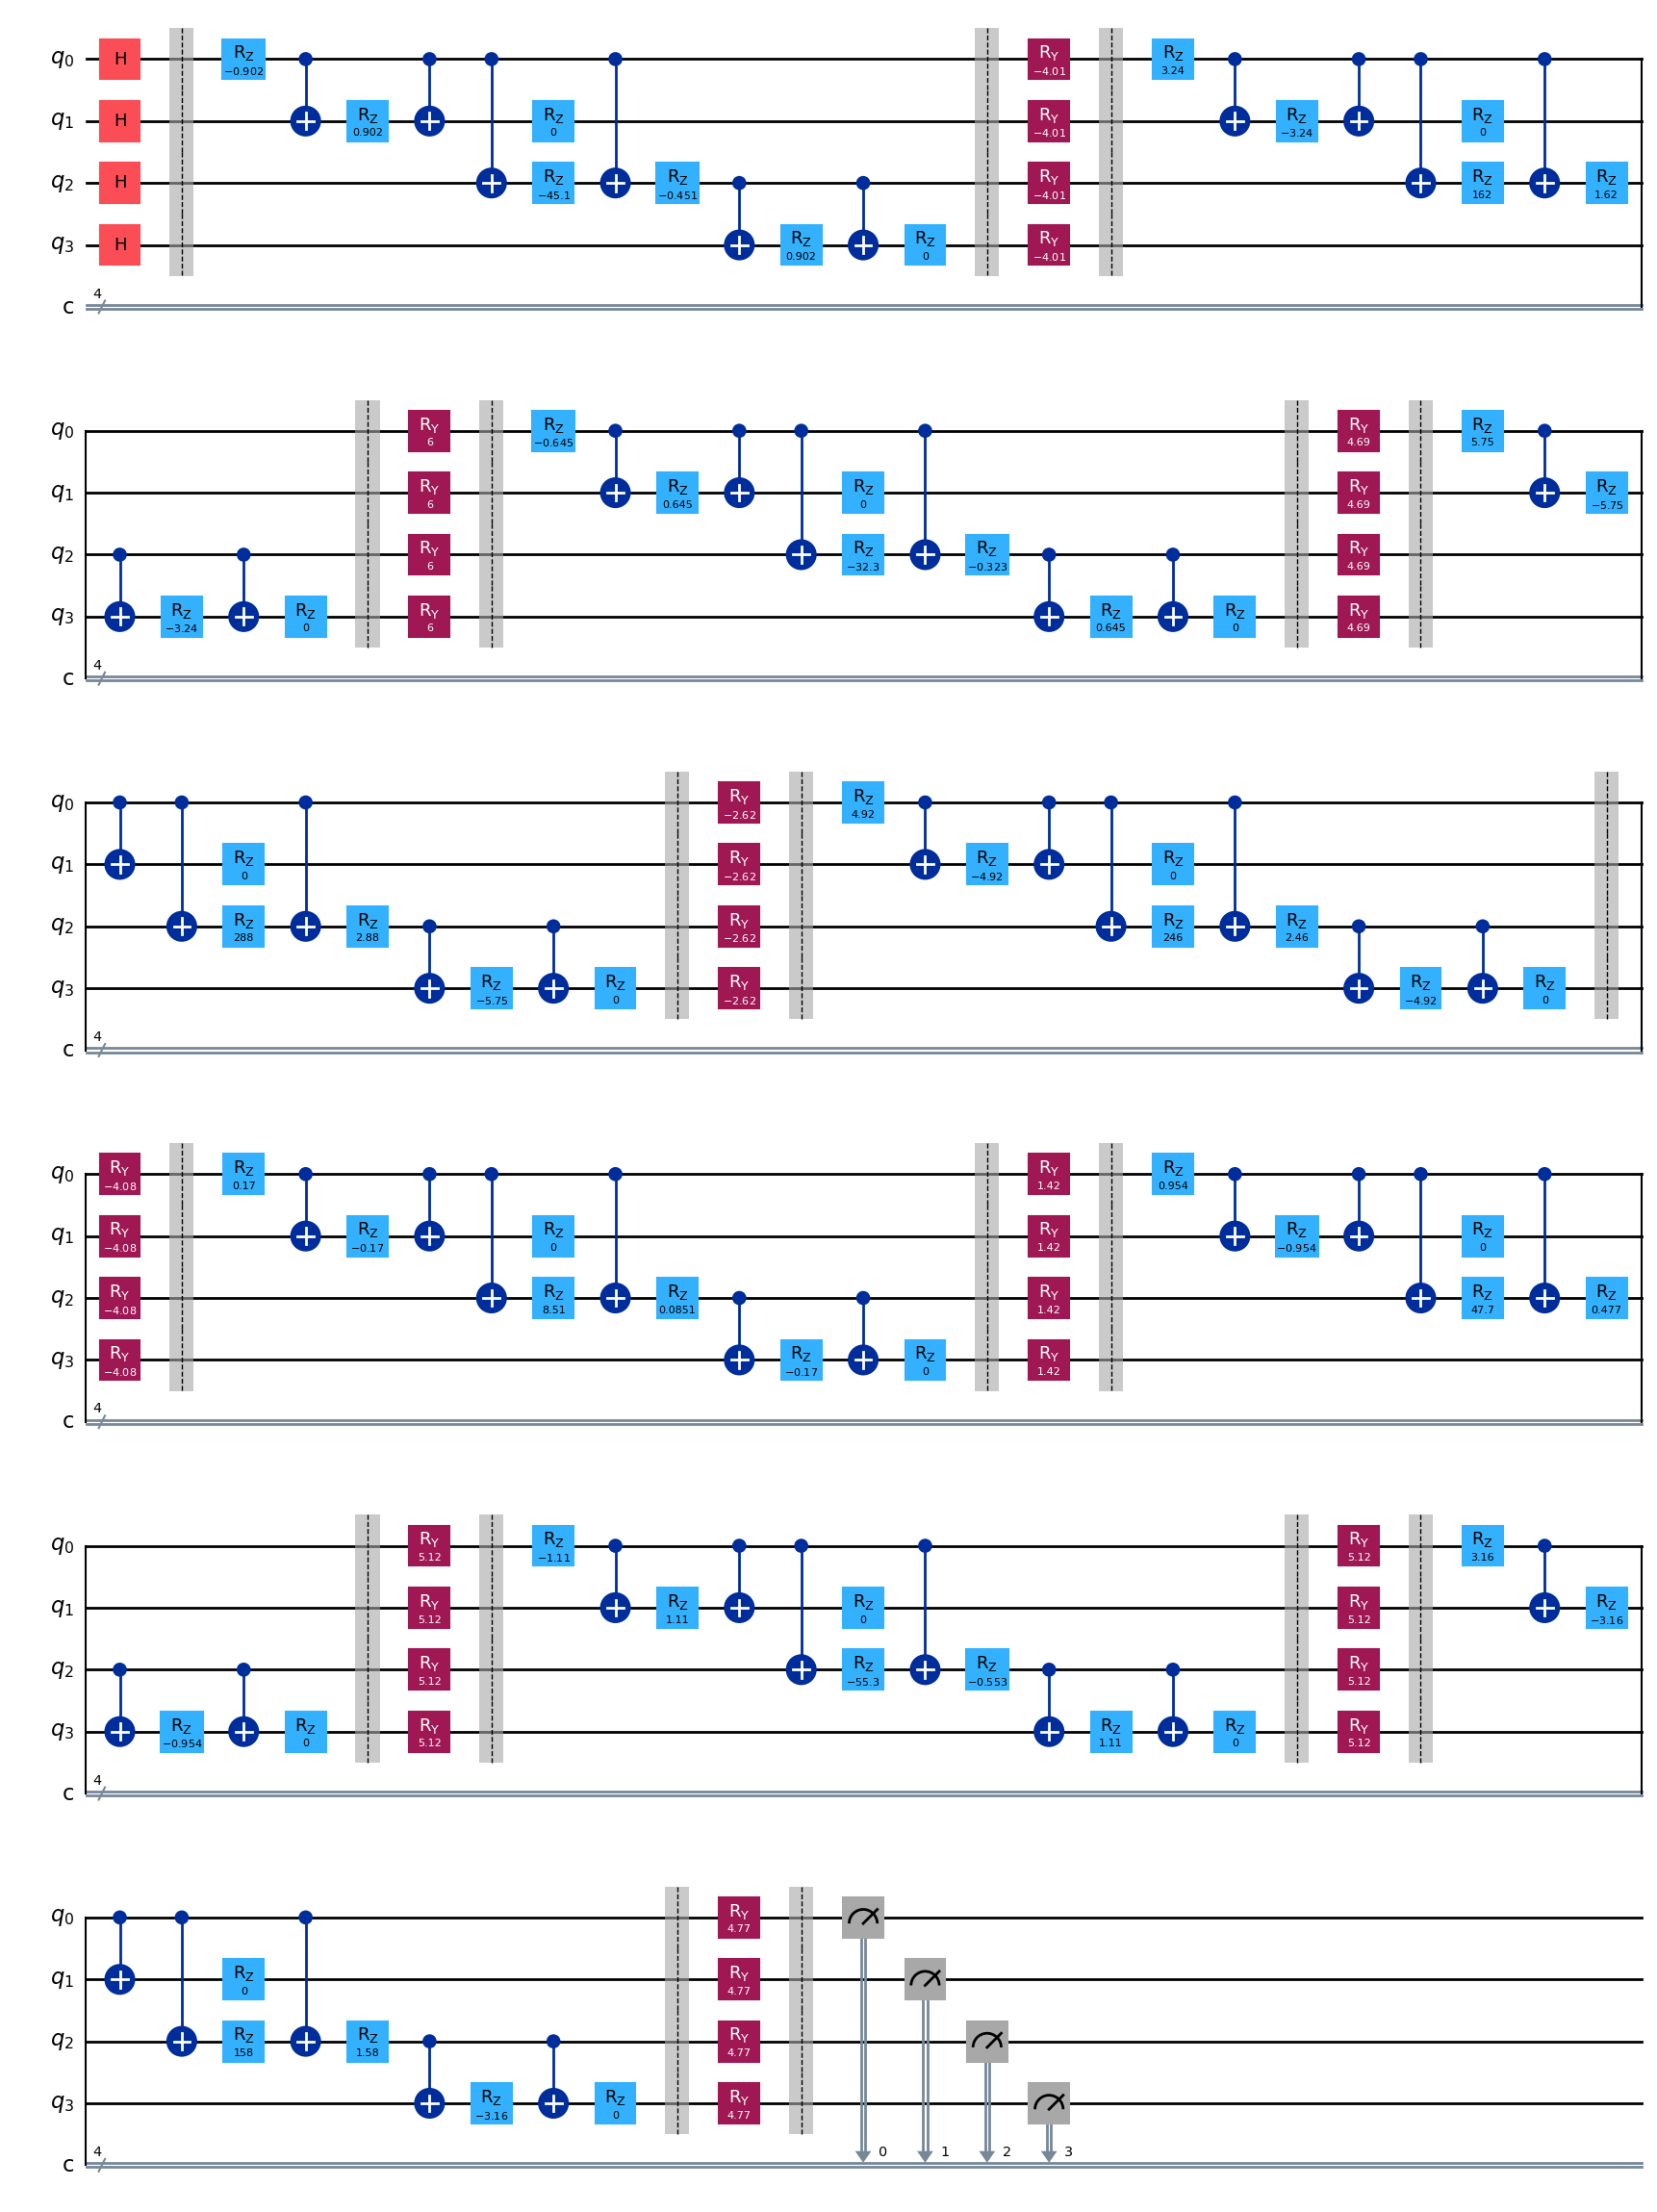

In [25]:
print("Circuit depth: ", qc.depth()," | Number of qubits: ",qc.size())
display(qc.draw('mpl', style="iqp"))